In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [5]:

data = pd.read_csv('healthcare_data.csv')


print("--- Dataset Header ---")
print(data.head())
print("\n--- Dataset Info ---")
print(data.info())
print("\n--- Summary Statistics ---")
print(data.describe())

--- Dataset Header ---
   Recency  Frequency  Monetary  Time  Class
0        2         50     12500    99      1
1        0         13      3250    28      1
2        1         17      4000    36      1
3        2         20      5000    45      1
4        1         24      6000    77      0

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Class      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB
None

--- Summary Statistics ---
          Recency   Frequency      Monetary        Time       Class
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.516043   1378.676471   34.284759    0.237968
std      8.095396    5.841825   1459.82

In [6]:

X = data.drop('Class', axis=1)
y = data['Class']


numerical_features = ['Recency', 'Frequency', 'Monetary', 'Time']

preprocessor = Pipeline(steps=[
    ('scaler', StandardScaler())
])

print("Features identified:", numerical_features)
print("Target identified: Class")

Features identified: ['Recency', 'Frequency', 'Monetary', 'Time']
Target identified: Class


In [7]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)
print("Model training completed successfully!")

Model training completed successfully!


--- Confusion Matrix ---
[[100  13]
 [ 28   9]]

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       113
           1       0.41      0.24      0.31        37

    accuracy                           0.73       150
   macro avg       0.60      0.56      0.57       150
weighted avg       0.69      0.73      0.70       150



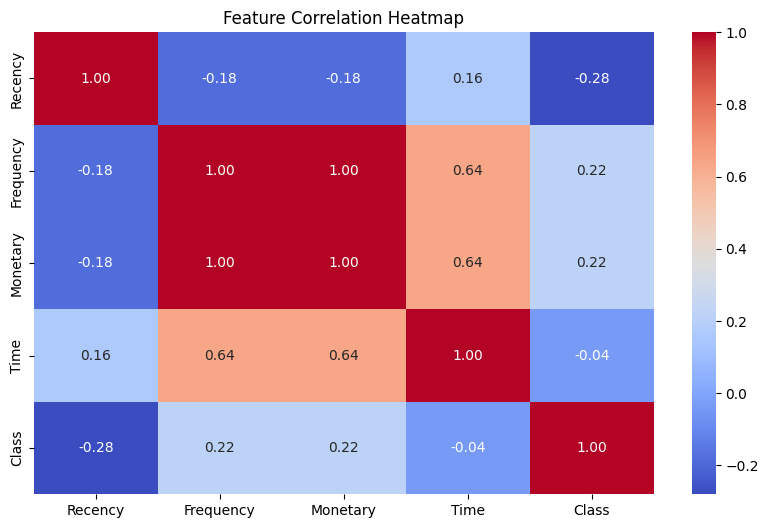

In [8]:

y_pred = model_pipeline.predict(X_test)

print("--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [9]:
def generate_recommendation(patient_data):
    # Predict the class (0 or 1)
    prediction = model_pipeline.predict(patient_data)[0]
    
    recommendation_mapping = {
        0: 'No immediate action needed. Continue maintaining a healthy lifestyle.',
        1: 'Recommendation: Scheduled health check-up or blood screening is advised.'
    }
    
    return recommendation_mapping.get(prediction, "Consult a specialist for further advice.")

# Example: Input data for a new patient
new_patient = pd.DataFrame({
    'Recency': [2],
    'Frequency': [50],
    'Monetary': [12500],
    'Time': [98]
})

result = generate_recommendation(new_patient)
print(f"Health Assessment for Patient: {result}")

Health Assessment for Patient: Recommendation: Scheduled health check-up or blood screening is advised.


C:\Users\arulb\AppData\Local\Temp\ipykernel_856\4123052381.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='viridis')


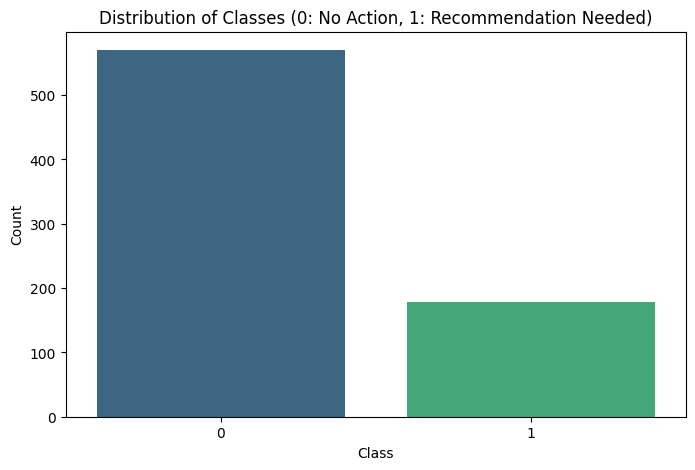

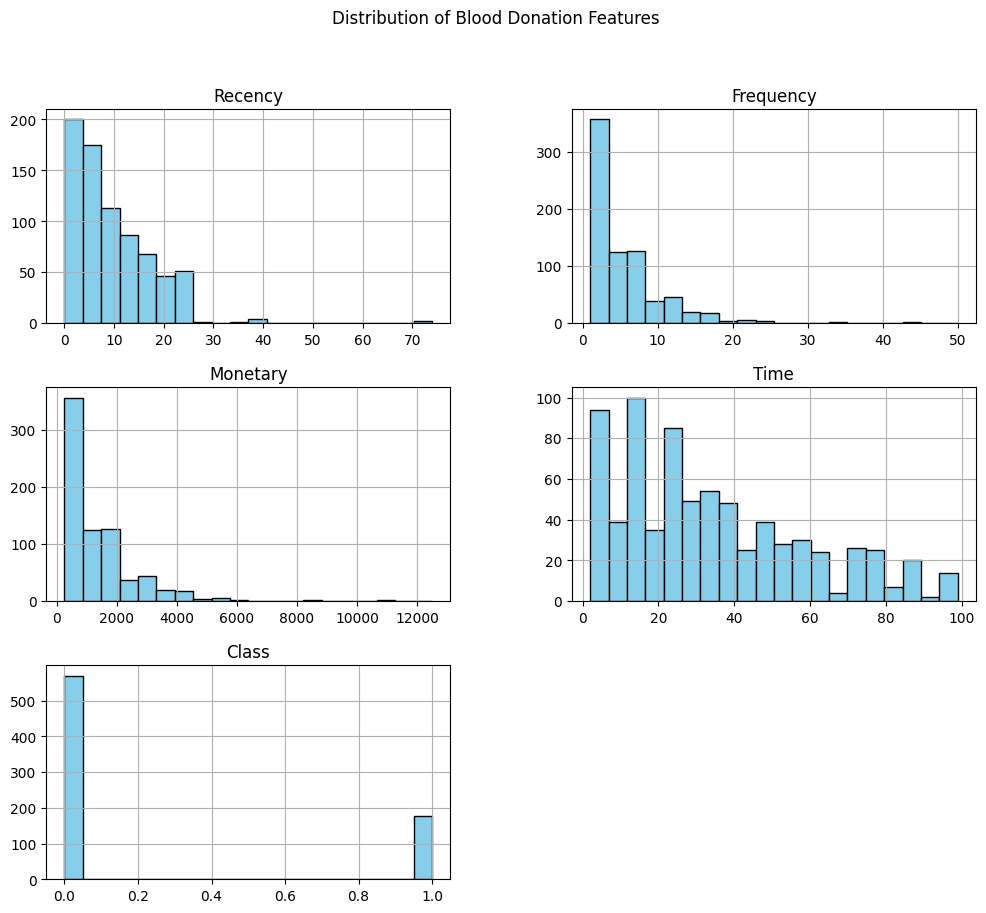

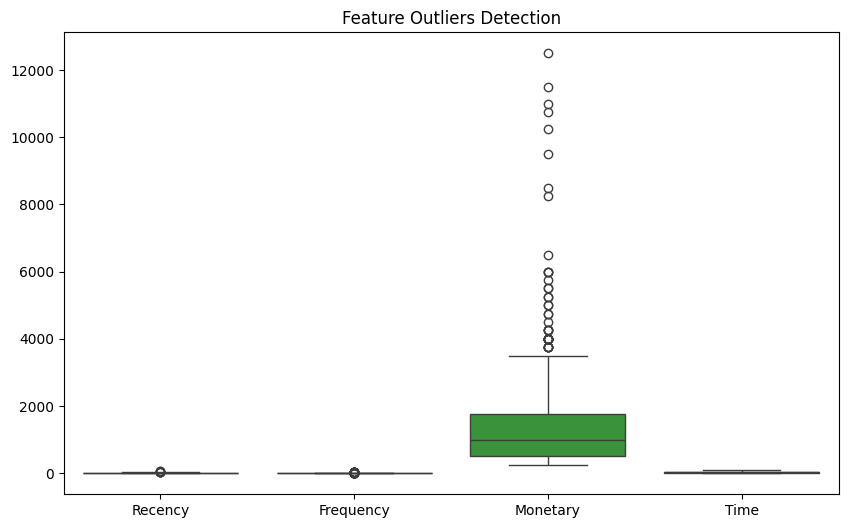

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=data, palette='viridis')
plt.title('Distribution of Classes (0: No Action, 1: Recommendation Needed)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# 2. Histograms for features to see distributions
data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Blood Donation Features')
plt.show()

# 3. Boxplots to identify outliers in Frequency or Monetary values
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop('Class', axis=1))
plt.title('Feature Outliers Detection')
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression


log_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, log_pred))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       113
           1       0.57      0.11      0.18        37

    accuracy                           0.76       150
   macro avg       0.67      0.54      0.52       150
weighted avg       0.72      0.76      0.69       150



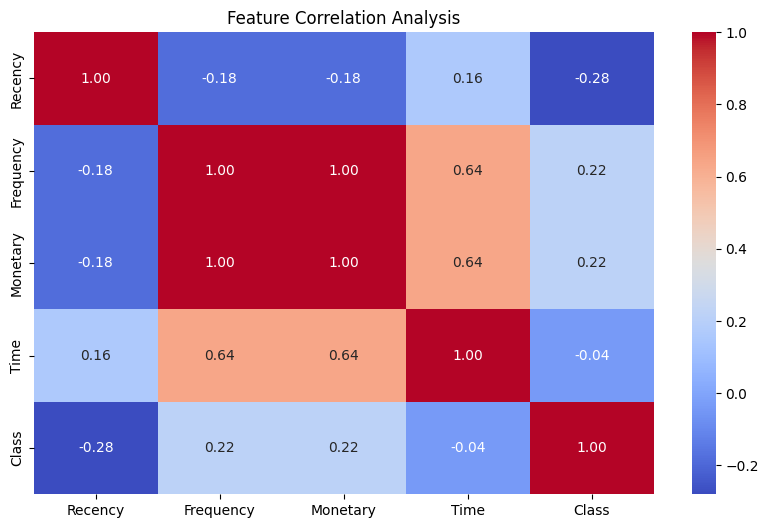

C:\Users\arulb\AppData\Local\Temp\ipykernel_856\1718948564.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='magma')


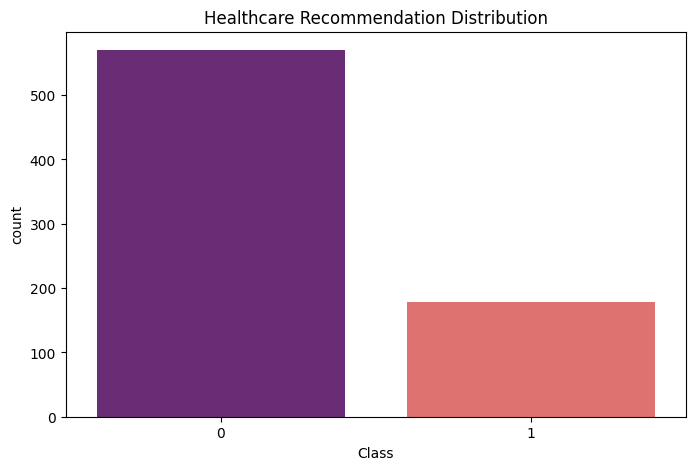

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Analysis')
plt.savefig('heatmap.png') # This saves the file
plt.show()

# Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=data, palette='magma')
plt.title('Healthcare Recommendation Distribution')
plt.savefig('distribution.png') # This saves the file
plt.show()